<a href="https://colab.research.google.com/github/EmmanuelChinkaka/PUS2022_EChinkaka/blob/main/HW5/TimeSeriesClustering_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering analysis on population trends

You are clustering the "shape" of time series to find trends, specifically, population growth trends. Do any countries stand out in the population growth trends in the past 60 years? are there groups of countries that have similar trends (and why?)

NOTE: your clusters may not be identical to mine!
## Imports

In [12]:
import pandas as pd
import pylab as pl
import numpy as np

from sklearn import preprocessing
from sklearn import cluster

pl.rcParams['font.size'] = 10

This is done inorder to read the excel file from my drive. 

In [13]:
pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Data processing

## Get the data

The data will be pulled from the drive. So, here I mount my google drive and get it from `/content/drive/Shareddrives/PUS2022/data`. The file name is `SP.POP.TOTL?downloadformat=excel`

Will have to skip some rows (`skiprows=`) and ideally only use relevant columns (the country name and each year column from 1960, you can use `usecold=` 

Finally, will set the country name as the index for this dataframe. Will do that with `set_index()` passing the relevant column name as the argument (Not forgeting the idea is to wanting to do it inplace! `inplace=True`)

In [17]:
#Here I mount my drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Checking that I mounted on the right drive and have access to the excel data in PUS2022 folder

In [19]:
cd /content/drive/Shareddrives/PUS2022/data

/content/drive/Shareddrives/PUS2022/data


In [21]:
#reading in the data from the excel in the drive
pop_df = pd.read_excel('SP.POP.TOTL?downloadformat=excel', skiprows=3)
columns = ['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']    
pop_df = pop_df[columns]  
pop_df.set_index("Country Name", inplace=True)                 
pop_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
"Yemen, Rep.",5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,6001858.0,6097042.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
South Africa,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,20942147.0,21496075.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0


In [22]:
#Checking the data content from the first 5 rows
pop_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


##Data Cleaning 
To remove NaNs and also remove any other unwanted columns

In [23]:
from pandas.core.ops.array_ops import Any
pop_df_clean = pop_df.dropna()

In [25]:
#Determining the shape of the data
print("The shape of the cleaned dataset is: ", pop_df_clean.shape)

The shape of the cleaned dataset is:  (262, 61)


In [ ]:
#Checking the content of the first 5 rows of the cleaned  dateset with NO NaNs 
pop_df_clean.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [26]:
#Checking the content of the last 5 rows of the cleaned  dateset with NO NaNs 
pop_df_clean.tail()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
"Yemen, Rep.",5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,5816241.0,5907873.0,6001858.0,6097042.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
South Africa,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,19888259.0,20406863.0,20942147.0,21496075.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
Zambia,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,3681953.0,3797877.0,3918872.0,4045740.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0
Zimbabwe,3776679.0,3905038.0,4039209.0,4178726.0,4322854.0,4471178.0,4623340.0,4779825.0,4941901.0,5111326.0,...,12894323.0,13115149.0,13350378.0,13586710.0,13814642.0,14030338.0,14236599.0,14438812.0,14645473.0,14862927.0


## Scaling (standardizing)

Standardize the data: We are working with time series, so each datapoint (=each country) has to be mean 0 and standard deviaion 1 along the rows (that is axis 1)

We use the `preprocessing.scale` function. Make sure you check! you want eavery country mean to be 0 and every country standard deviation to be 1...

In [27]:
# standardizing the data
X= pop_df_clean.values
pop_standard = preprocessing.scale(X, axis=1, with_mean = True, with_std = True)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:236: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  "Numerical issues were encountered "


## Visualize the data

Making a plot of the time series before scaling, and after scaling. What do you see in the scaled version that was lost before? Dont forget to write a caption!

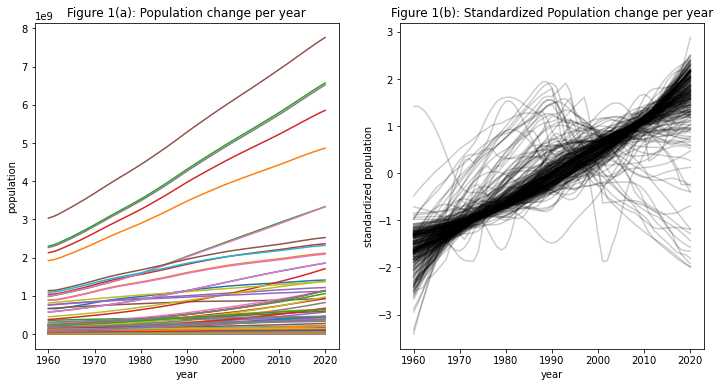

In [30]:
# looking at the data
fig, ax = pl.subplots(1,2, figsize=(12,6))
pop_df_clean.T.plot(legend=False, ax=ax[0])
ax[1].plot(pop_standard.T, color="k", alpha=0.2)

ax[0].set_title("Figure 1(a): Population change per year")
ax[0].set_xlabel("year")
ax[0].set_ylabel("population")
ax[1].set_title("Figure 1(b): Standardized Population change per year")
ax[1].set_xlabel("year")
ax[1].set_ylabel("standardized population")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);

Figure 1(a): Shows the population (in billions) of various countries represented in in different colors between 1960 and 2020 Before Scaling.

Figure 1(b): Shows the same population in a standadized scale represented in in different colors between 1960 and 2020 after Scaling. We now see a proper trend of the data that was lost before scaling.

# Make a cluster model with KMeans
Use kmeans (`sklearn.cluster.KMeans`) to cluster the data. Make 9 models for number of clusters = 2, 3, 4, 5, 6, 7, 8, 9, 10. 

For each model, fit the data and calculate the "inertia" which is 

# Use an elbow plot to figure out ideal cluster _n_ 

In [52]:
# For n_clusters = 2 this would look as:
model = cluster.KMeans(n_clusters = 2)
model.fit(pop_standard)
X = model.inertia_
print('The model inertia is:', f"{X:.4f}" )


The model inertia is: 1249.5287


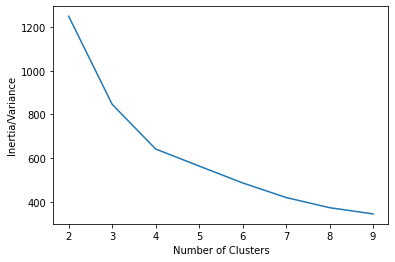

In [53]:
# Now using the "inertia" (intracluster variance essentially) to make an Elbow plot: 
# inertia is the y axis, the number of clusters are the x axis.
# Now assessing if the elbow plot shows an inflection, which can be used to determine the "right" number of clusters
inertia = []
for i in range(2, 10): 
  model = cluster.KMeans(n_clusters = i)
  model.fit(pop_standard)
  
  inertia.append(model.inertia_)
pl.plot(range(2, 10), inertia)
pl.xlabel("Number of Clusters")
pl.ylabel("Inertia/Variance");

Figure 2: "Elbow plot" of k-means clustering of our time series. The y axis shows the sum of squared distances to the closest centroid (scikit calls this "inertia", Fed called it "variance"). The point where inertia/variance dramatically drops in an elbow plot is recommended as the preferred number of clusters; this line has a bit too much of a gradual descent to make an effective recommendation. I'm just going to keep using 4 because that's what we used in class. 

## Pick a model
Pick the model you prefer from the suite of models above, plot the data for each cluster separately. 
If for example you have made 4 clusters, then you fould do:

```
fig,ax = pl.subplots(2,2, figsize=(12,14))


ax[0,0].set_title("Cluster 1")
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,0].plot(pop_standard[model.label_[1] == 0].T, "k", alpha=0.2);
ax[0,0].plot(c[0][0], color="hotpink")

ax[0,1]....

ax[1,0]....

ax[1,1]....
```

In [56]:
# For n_clusters = 2 this would look as:
model = cluster.KMeans(n_clusters = 4)
model.fit(pop_standard)
Y = model.inertia_
print('The model inertia is:', f"{Y:.4f}" )

The model inertia is: 645.6781


In [57]:
#Here we now chech the model lables
model.labels_

array([2, 2, 2, 2, 2, 3, 0, 2, 2, 0, 3, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1,
       2, 0, 1, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 3, 3, 2, 2, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 3, 0, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       0, 2, 3, 2, 0, 3, 0, 0, 2, 2, 1, 0, 1, 0, 0, 2, 2, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 3, 3, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 3, 2, 2, 2, 0, 0, 0,
       3, 2, 2, 0, 0, 3, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       3, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 3, 2, 3, 0, 0, 0, 0, 0, 0, 2, 1,
       3, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 3, 3, 2,
       0, 0, 0, 0, 2, 2, 0, 3, 2, 0, 2, 0, 0, 2, 0, 3, 0, 2, 0, 0, 0, 0,
       2, 2, 1, 0, 0, 0, 0, 3, 0, 2, 3, 0, 2, 0, 0, 3, 2, 0, 2, 0],
      dtype=int32)

In [59]:
#Definting the models c, and determine the model centers in the k-means cluster
c = model.cluster_centers_

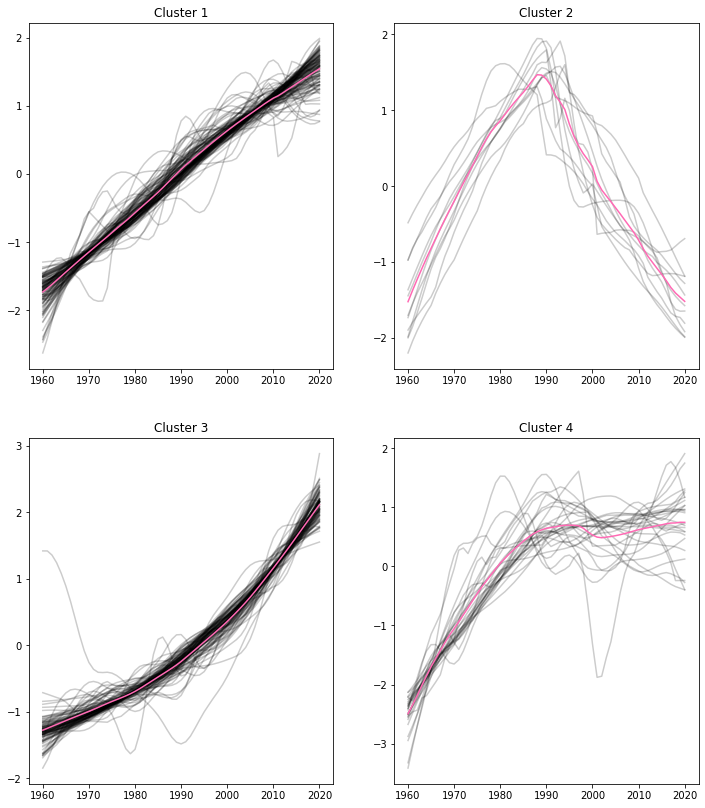

In [60]:
fig,ax = pl.subplots(2,2, figsize=(12,14))


ax[0,0].set_title("Cluster 1")
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,0].plot(pop_standard[model.labels_ == 0].T, "k", alpha=0.2);
ax[0,0].plot(c[0], color="hotpink")

ax[0,1].set_title("Cluster 2")
ax[0,1].set_xticks(range(0,70,10))
ax[0,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,1].plot(pop_standard[model.labels_ == 1].T, "k", alpha=0.2);
ax[0,1].plot(c[1], color="hotpink")

ax[1,0].set_title("Cluster 3")
ax[1,0].set_xticks(range(0,70,10))
ax[1,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,0].plot(pop_standard[model.labels_ == 2].T, "k", alpha=0.2);
ax[1,0].plot(c[2], color="hotpink")

ax[1,1].set_title("Cluster 4")
ax[1,1].set_xticks(range(0,70,10))
ax[1,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,1].plot(pop_standard[model.labels_ == 3].T, "k", alpha=0.2);
ax[1,1].plot(c[3], color="hotpink")

Figure 3: Results of using k-means clustering on the standardized data seen in Figure 1. The mean line for each cluster is visible in pink.

Cluster 1 is a a fairly linear upward trend with some outliers and cluster 4 a more curved upward trend. Cluster 2 and cluster 4 have fewer time series; 2 rises steadily before a big drop in the 1990s whereas the countries in 3 kind of hit a plateau around the 1990s. 

# Extra Credit: Doing the same analysis using agglomerative clustering method. 

In [62]:
# For n_clusters = 4 this would look as:
model = cluster.AgglomerativeClustering(n_clusters = 4)
model.fit(pop_standard)
model.labels_


array([1, 1, 1, 1, 1, 0, 3, 1, 1, 3, 0, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 2,
       1, 3, 2, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 3, 3, 3, 1, 1, 1,
       1, 3, 1, 3, 3, 3, 0, 0, 1, 1, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 1, 3, 3, 2, 1, 3, 1, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 1, 1, 1, 1,
       3, 1, 0, 1, 3, 0, 3, 3, 1, 1, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 3, 1,
       3, 1, 3, 1, 3, 3, 1, 0, 0, 1, 3, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 1, 3, 3, 3, 3, 3, 3, 2, 1, 2, 1, 3, 3, 3, 0, 1, 1, 3, 3, 3, 3,
       0, 1, 1, 3, 3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3,
       3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 0, 1, 0, 3, 3, 3, 3, 3, 3, 1, 2,
       0, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       3, 3, 3, 3, 1, 1, 3, 0, 1, 3, 3, 3, 3, 1, 3, 0, 3, 1, 3, 3, 3, 3,
       1, 1, 2, 3, 3, 3, 3, 0, 3, 1, 0, 3, 1, 3, 3, 0, 1, 3, 1, 3])

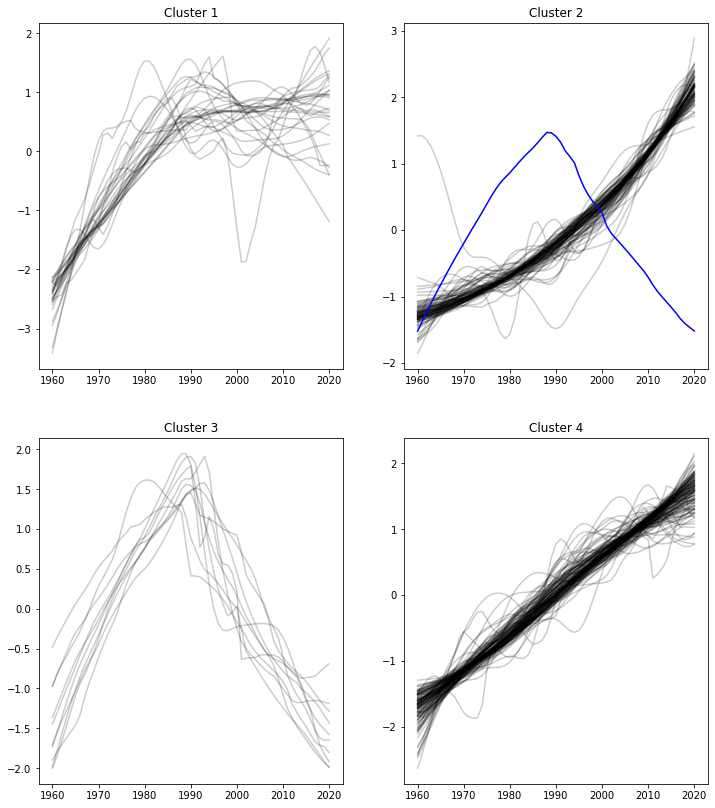

In [69]:
fig,ax = pl.subplots(2,2, figsize=(12,14))


ax[0,0].set_title("Cluster 1")
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,0].plot(pop_standard[model.labels_ == 0].T, "k", alpha=0.2);
#ax[0,0].plot(c[0], color="red")

ax[0,1].set_title("Cluster 2")
ax[0,1].set_xticks(range(0,70,10))
ax[0,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0,1].plot(pop_standard[model.labels_ == 1].T, "k", alpha=0.2);
#ax[0,1].plot(c[1], color="blue")

ax[1,0].set_title("Cluster 3")
ax[1,0].set_xticks(range(0,70,10))
ax[1,0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,0].plot(pop_standard[model.labels_ == 2].T, "k", alpha=0.2);
#ax[1,0].plot(c[2], color="hotpink")

ax[1,1].set_title("Cluster 4")
ax[1,1].set_xticks(range(0,70,10))
ax[1,1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1,1].plot(pop_standard[model.labels_ == 3].T, "k", alpha=0.2);
#ax[1,1].plot(c[3], color="hotpink")

Further, we determine the number of objects in each cluster below:

In [70]:
for i in range(4):
  print ("total items in cluster {:d}: {:d}".format(
      i+1, np.sum(model.labels_ == i)))

total items in cluster 1: 28
total items in cluster 2: 96
total items in cluster 3: 10
total items in cluster 4: 128


# Identifying the countries in the smallest clusters

plot the two smallest clusters with labels for the countries

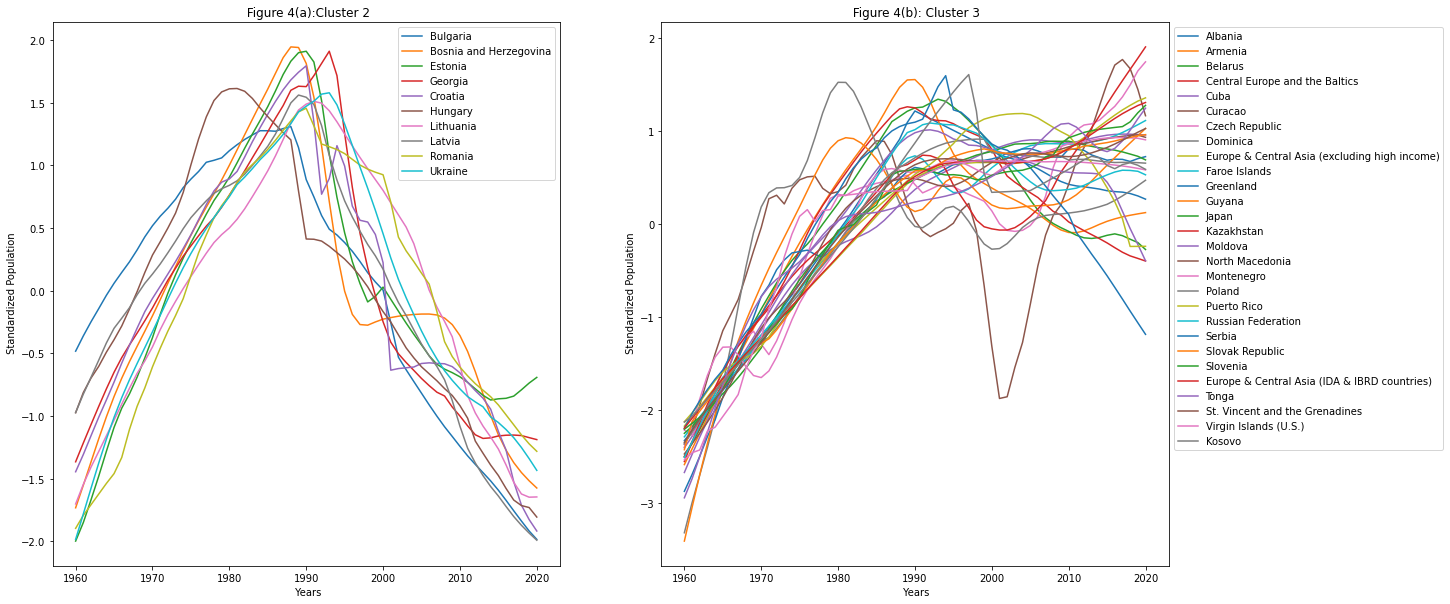

In [84]:
fig,ax = pl.subplots(1,2, figsize=(20,10))

ax[1].set_title(" Figure 4(b): Cluster 3")
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[1].plot(pop_standard[model.labels_ == 0 ].T);
ax[1].legend(labels=pop_df_clean.loc[model.labels_ == 0].index, bbox_to_anchor=(1.0, 1.0), loc='upper left')
ax[1].set_xlabel(' Years')
ax[1].set_ylabel(' Standardized Population');



ax[0].set_title(" Figure 4(a):Cluster 2")
ax[0].set_xticks(range(0,70,10))
ax[0].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)]);
ax[0].plot(pop_standard[model.labels_ == 2 ].T);
# placing legend method via https://www.delftstack.com/howto/matplotlib/how-to-place-legend-outside-of-the-plot-in-matplotlib/

ax[0].legend(labels=pop_df_clean.loc[model.labels_ == 2].index)
ax[0].set_xlabel(' Years')
ax[0].set_ylabel(' Standardized Population');

Figure 4(a):Shows the plot of the standardized population over the years from 1960 to 2020 for the countries in cluster 2. Figure 4(b): Shows the plot of the standardized population over the years from 1960 to 2020 for the countries in cluster 3. 

These countries cluster together due to similarities in thier economic status.These are are all relatively hight income countries.
https://data.worldbank.org/indicator/SP.POP.GROW?locations=XD&name_desc=true 




